In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Exercise 1.

In [3]:
x = np.array([[-400,-400],[-410,-410],[-415,-415]])
x_pb = x
x_sb = x[2]
v = np.array([[-50,-50],[-50,-50],[-50,-50]])
omega = [2,0.5,0.1]

def update_particle(x, v, omega):
    r1 = r2 = 0.5
    alpha1 = alpha2 = 1
    for i in range(0, len(x)):
        v[i] = omega*v[i] + alpha1 * r1 * (x_pb[i] - x[i]) + alpha2 * r2 * (x_sb - x[i])

    for i in range(0, len(x)):
        for j in range(0, len(x[i])):
            x[i][j] = max(-500, min(500, x[i][j] + v[i][j]))
    return x, v

def compute_fitness(x):
    fit = []
    for i in range(0,len(x)):
        temp_fit = 0
        for j in range(0, len(x[i])):
            temp_fit += (-x[i][j]) * np.sin(np.sqrt(abs(x[i][j])))
        fit.append(np.sum(temp_fit))
    return fit

def PSO(x, v, omega, steps, prints = False):
    
    fitnesses = np.zeros((steps,len(x)))
    x_list = np.zeros((steps,len(x),len(x[0])))
    v_list = np.zeros((steps,len(v),len(v[0])))

    for i in range(0,steps):
        fit = compute_fitness(x)

        fitnesses[i] = fit
        x_list[i] = x
        v_list[i] = v

        if prints:
            print('----------------------------')
            print('velocity: ', v)
            print('current x: ', x)
            print('fitness: ', fit)
        
        x, v = update_particle(x,v,omega)

    return np.array(x_list), np.array(v_list), np.array(fitnesses)
    

omega = 0.1
x_list, v_list, fitnesses = PSO(x,v,omega,2,False)

#print(x_list[:,0,0])
#plt.plot(x_list[:,:,0], x_list[:,:,1], 'o')
#plt.axis([-500, 500, -500, 500])

# Exercise 2.

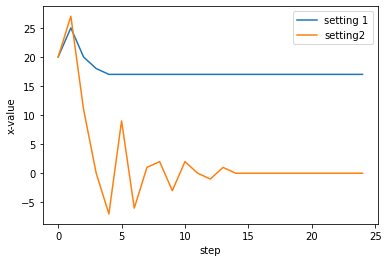

In [4]:
def update_particle(x, v, params, x_pb, x_sb):
    omega = params[0]
    r1 = r2 = params[1]
    alpha1 = alpha2 = params[2]
    
    for i in range(0, len(x)):
        v[i] = omega*v[i] + alpha1 * r1 * (x_pb[i] - x[i]) + alpha2 * r2 * (x_sb - x[i])

    x = x + v

    return x, v


def compute_fitness(x):
    return x**2


def PSO(x, v, params, steps, prints = False):
    
    best_fit = compute_fitness(x)
    x_pb = x
    x_sb = x_pb

    fitnesses = np.zeros((steps,len(x)))
    x_list = np.zeros((steps,len(x)))
    v_list = np.zeros((steps,len(v)))

    for i in range(0,steps):
        fit = compute_fitness(x)

        fitnesses[i] = fit
        x_list[i] = x
        v_list[i] = v

        if fit < best_fit:
            x_pb = x
            x_sb = x_pb
            best_fit = fit

        if prints:
            print('----------------------------')
            print('velocity: ', v)
            print('current x: ', x)
            print('fitness: ', fit)
        
        x, v = update_particle(x,v,params, x_pb, x_sb)

    return np.array(x_list), np.array(v_list), np.array(fitnesses)


x = np.array([20])
v = np.array([10])

setting1 = [0.5, 1.5, 0.5]
setting2 = [0.7, 1.5, 1]

res_set1 = PSO(x, v, setting1, 25, False)

x = np.array([20])
v = np.array([10])
res_set2 = PSO(x, v, setting2, 25, False)

plt.plot(res_set1[0], label = 'setting 1')
plt.plot(res_set2[0], label = 'setting2')
plt.xlabel('step')
plt.ylabel('x-value')
plt.legend()


# Exercise 3.

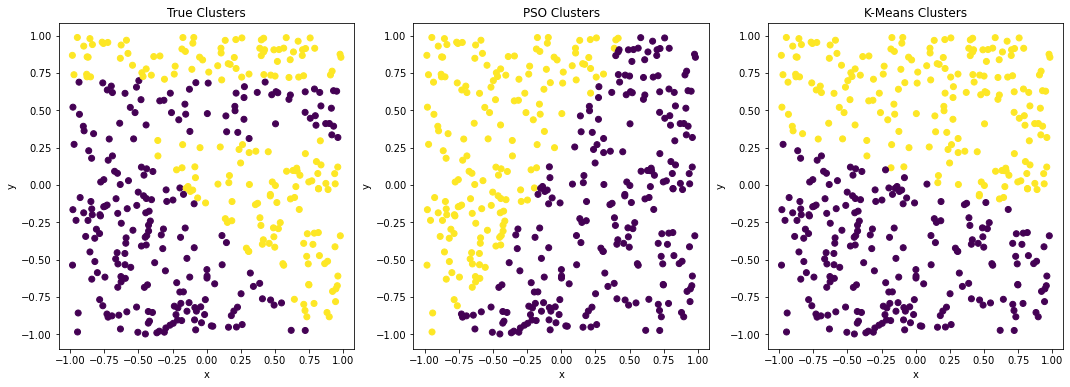

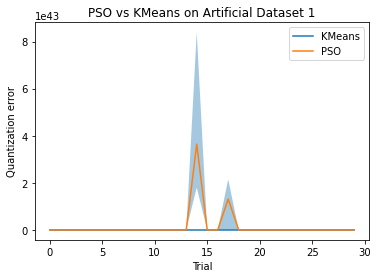

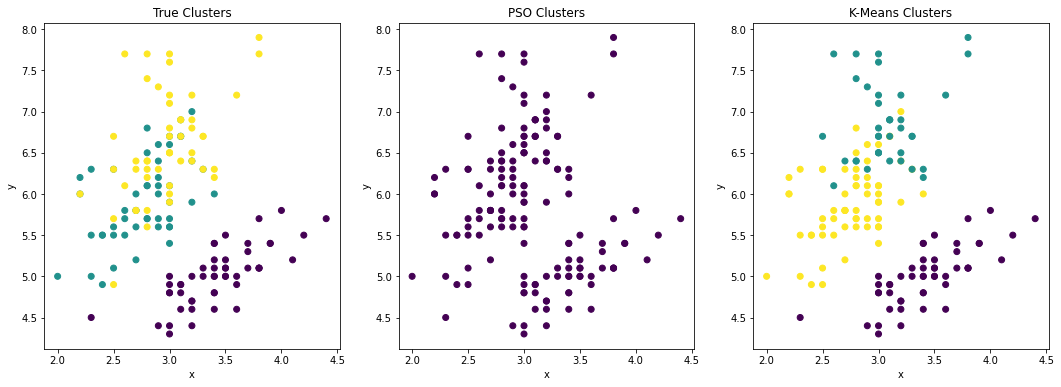

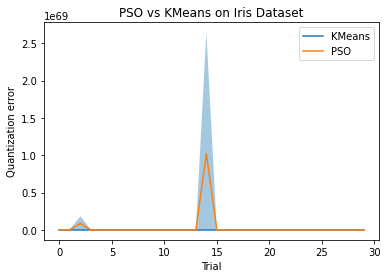

In [70]:
def initialize(data, nr_particles, N):
    locations = np.random.choice(range(data.shape[0]), size=(nr_particles, N))
    return data[locations]

def fitness(centroids, data_labels, data, N):
    # print('fitness')

    fitness = []
    for c, cent in enumerate(centroids):
        loc = np.where(data_labels == c)[0]
        distance = 0

        for l in loc:
            distance += np.linalg.norm(data[l] - cent) / loc.shape[0]
        fitness.append(distance/N)

    return sum(fitness)

def update_particle(x, v, x_lb, x_gb, r1, r2):
    omega = 0.72
    alpha1 = alpha2 = 1.49
    
    for i in range(0, x.shape[0]):
        v[i] = omega*v[i] + alpha1 * np.dot(r1, (x_lb[i] - x[i])) + alpha2 * np.dot(r2,  (x_gb - x[i]))

    x = x + v

    return x, v


def PSO_clustering(data, nr_particles, N, max_iter):

    x = initialize(data, nr_particles, N)
    v = np.zeros_like(x)
    initial_labels = np.random.randint(low=0,high=2,size=(nr_particles, data.shape[0]))

    r1 = np.random.random(size=N)
    r2 = np.random.random(size=N)

    local_bests = x
    fit_lb = np.ones((x.shape[0])) * np.inf
    global_best = None
    fit_gb = np.inf
    # for i in range(x.shape[0]):
    #    fit_lb[i] = fitness(x[i], initial_labels, data, N)
    #    new_fit_gb = fit_lb[i]
    #    if new_fit_gb < fit_gb:
    #        fit_gb = new_fit_gb
    #        global_best = x[i]

    # Iterations
    for iter in range(0, max_iter):
        fitnesses = np.zeros((x.shape[0]))
        # Particles
        for i in range(0, x.shape[0]):

            # Data labels
            data_labels = np.zeros(data.shape[0])

            # Data point
            for j in range(0, data.shape[0]):

                # Euclidian distances
                distances = np.zeros(x.shape[1])

                # Centroid
                for c, centroid in enumerate(x[i]):
                    distances[c] = np.linalg.norm(centroid - data[j])

                data_labels[j] = np.argmin(distances)

            fit = fitness(x[i], data_labels, data, N)
            fitnesses[i] = fit
            if fit < fit_lb[i]:
                local_bests[i] = x[i]
                fit_lb[i] = fit
        
        if min(fitnesses) < fit_gb:
            global_best = x[np.argmin(fitnesses)]
            fit_gb = min(fitnesses)

        x, v = update_particle(x, v, local_bests, global_best, r1 , r2)
    
    return x, data_labels

def cluster_compare(data, classes, title):
    trial = 30
    N = np.unique(classes).shape[0]
    nr_particles = 10
    PSO_f = np.zeros((trial,nr_particles))
    km_f = np.zeros((trial))
    max_iter = 100
    for i in range(0,trial):
        particles, pso_classes = PSO_clustering(data, nr_particles, N, max_iter)
        kmeans = KMeans(N, init='random',n_init=10, max_iter=max_iter).fit(data)

        PSO_f[i] = [fitness(p, classes, data, N) for p in particles]
        km_f[i] = fitness(kmeans.cluster_centers_, classes, data, N)

    fig, ax = plt.subplots(1, 3, figsize=(18,6))
    ax[0].scatter(data[:,1], data[:,0],c=classes)
    ax[0].set_title("True Clusters")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[1].scatter(data[:,1], data[:,0],c=pso_classes)
    ax[1].set_title("PSO Clusters")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[2].scatter(data[:,1], data[:,0],c=kmeans.labels_)
    ax[2].set_title("K-Means Clusters")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    plt.show()

    plt.plot(range(trial),km_f, label="KMeans")
    plt.plot(range(trial),np.mean(PSO_f, axis=1), label="PSO")
    plt.fill_between(range(trial),np.amin(PSO_f, axis=1), np.amax(PSO_f, axis=1),  alpha = 0.4)
    plt.legend()
    plt.xlabel("Trial")
    plt.ylabel("Quantization error")
    plt.title("PSO vs KMeans on {}".format(title))
    plt.show()


data = np.random.uniform(-1,1,size=(400,2))
classes = np.array([1 if d[0] >= 0.7 or (d[0] <= 0.3 and d[1] >= -0.2-d[0]) else 0 for d in data])
cluster_compare(data, classes, "Artificial Dataset 1")

data = load_iris()['data']
classes = load_iris()['target']
cluster_compare(data, classes, "Iris Dataset")


# Exercise 4